In [4]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('Ferguson.xlsx')
df

D:\Users\aomurbaeva\AppData\Local\anaconda3\envs\ds-course\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,user,tweet,sentiment,"1 - positive, 2 - negative, 3 - neutral"
0,disetv,#stl we war ready #ripmikebrown #ferguson http...,2,NaN
1,deray,one of the best moments from ystrdy was when a...,2,NaN
2,deray,public art. canfield. photo. #ferguson http://...,3,NaN
3,deray,canfield. public art cont. #ferguson http://if...,3,NaN
4,deray,public art exhibit. canfield. #ferguson http:/...,3,NaN
...,...,...,...,...
1201,wuperkins,#ferguson black man telling story of mopping c...,2,NaN
1202,wuperkins,@ryanjreilly very good. now if @govjaynixon wo...,3,NaN
1203,wuperkins,@chucktodd hopefully folks r traveling to #fer...,3,NaN
1204,wuperkins,@wesleylowery hold govt. accountable. #nojusti...,3,NaN


Распределение классов:
sentiment
3    647
2    369
1    190
Name: count, dtype: int64


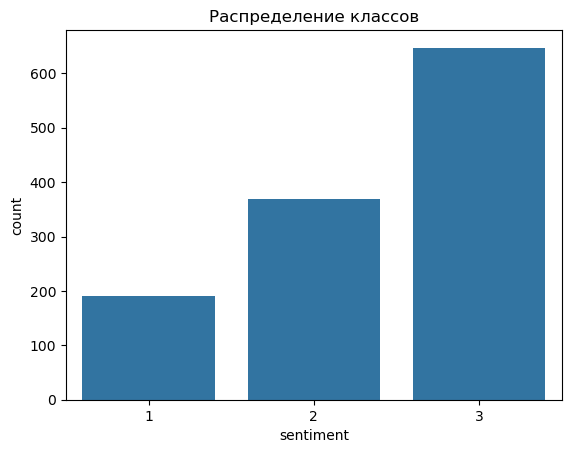

In [12]:
print("Распределение классов:")
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)
plt.title('Распределение классов')
plt.show()

In [15]:
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

# Удаление пунктуации
df['tweet'] = df['tweet'].apply(remove_punctuation)

# Вывод для проверки на ошибки
print("Первые строки данных после удаления пунктуации:")
print(df['tweet'].head())

Первые строки данных после удаления пунктуации:
0    stl we war ready ripmikebrown ferguson httpins...
1    one of the best moments from ystrdy was when a...
2    public art canfield photo ferguson httpiftttw1...
3    canfield public art cont ferguson httpifttt1ld...
4    public art exhibit canfield ferguson httpifttt...
Name: tweet, dtype: object


In [16]:
# Преобразование данных в TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['tweet'].astype(str))
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.24      0.35        38
           2       0.68      0.38      0.49        74
           3       0.63      0.92      0.75       130

    accuracy                           0.64       242
   macro avg       0.67      0.51      0.53       242
weighted avg       0.66      0.64      0.61       242



Модель хорошо идентифицирует позитивные сентименты. Общая точность составляет 0.64, что является неплохим значением

Модель плохо идентифицирует негативные и нейтральные сентименты (низкая полнота для классов 1 и 2).
Низкие значения F1-Score для классов 1 и 2 указывают на то, что модель часто путает эти сентименты с другими. Но возможно это происходит из-за общего количества сентиментов 1 и 2